In [30]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch 
from torch.utils.data import Dataset, Subset
from torch.utils.data import random_split
from PIL import Image
import os
import numpy as np

In [18]:
torch.cuda.is_available()

False

In [19]:
transformation = transforms.Compose( [transforms.Resize((32,32)), 
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                          std=[0.5, 0.5, 0.5])])

#change average sizes
#grabbing dataset
dataset = torchvision.datasets.ImageFolder('dataset', 
                                                transform=transformation)

#randomly splitting for training and testing
training_set, testing_set = random_split(dataset, [2494, 832])


                                                
train_loader = torch.utils.data.DataLoader(training_set, batch_size=100, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(testing_set, batch_size=100, shuffle=True, num_workers=2)


In [20]:
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as td


#building neural network
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layer = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.LeakyReLU(inplace=True),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.LeakyReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(inplace=True),
        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )
        self.fc_layer = nn.Sequential(
        nn.Dropout(p=0.1),
        nn.Linear(8 * 8 * 64, 1000),
        nn.ReLU(inplace=True),
        nn.Linear(1000, 512),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.1),
        nn.Linear(512, 10)
    )
    def forward(self, x):
        # conv layers
        x = self.conv_layer(x)
        # flatten
        x = x.view(x.size(0), -1)
        # fc layer
        x = self.fc_layer(x)
        return x


In [25]:
num_epochs = 15
num_classes = 10
learning_rate = 0.001


In [26]:
#initializing CNN
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [27]:
#training the model
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())
        # Backprop and optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Train accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)
    print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
        .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
        (correct / total) * 100))

Epoch [1/15], Step [25/25], Loss: 1.5929, Accuracy: 36.17%
Epoch [2/15], Step [25/25], Loss: 1.5218, Accuracy: 41.49%
Epoch [3/15], Step [25/25], Loss: 1.3596, Accuracy: 45.74%
Epoch [4/15], Step [25/25], Loss: 1.2327, Accuracy: 48.94%
Epoch [5/15], Step [25/25], Loss: 1.3165, Accuracy: 55.32%
Epoch [6/15], Step [25/25], Loss: 1.1415, Accuracy: 58.51%
Epoch [7/15], Step [25/25], Loss: 0.8443, Accuracy: 64.89%
Epoch [8/15], Step [25/25], Loss: 0.9468, Accuracy: 65.96%
Epoch [9/15], Step [25/25], Loss: 0.7957, Accuracy: 70.21%
Epoch [10/15], Step [25/25], Loss: 0.6425, Accuracy: 79.79%
Epoch [11/15], Step [25/25], Loss: 0.5497, Accuracy: 82.98%
Epoch [12/15], Step [25/25], Loss: 0.5232, Accuracy: 76.60%
Epoch [13/15], Step [25/25], Loss: 0.4806, Accuracy: 85.11%
Epoch [14/15], Step [25/25], Loss: 0.5562, Accuracy: 79.79%
Epoch [15/15], Step [25/25], Loss: 0.3008, Accuracy: 88.30%


In [28]:
#Saving Model
# path = r"/Users/jgold/Documents/GitHub/Artifical-Intelligence-Project/Models/Model2.pt"

# torch.save(model.state_dict(), path)

In [32]:
#testing the model after it has beeen trained
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print('Test Accuracy of the model on the 600 test images: {} %'
          .format((correct / total) * 100))

Test Accuracy of the model on the 600 test images: 50.0 %
Test Accuracy of the model on the 600 test images: 50.0 %
Test Accuracy of the model on the 600 test images: 50.66666666666667 %
Test Accuracy of the model on the 600 test images: 50.5 %
Test Accuracy of the model on the 600 test images: 51.4 %
Test Accuracy of the model on the 600 test images: 53.0 %
Test Accuracy of the model on the 600 test images: 53.57142857142857 %
Test Accuracy of the model on the 600 test images: 52.0 %
Test Accuracy of the model on the 600 test images: 52.28365384615385 %


Time to evaluate our data.
First will be the training data.


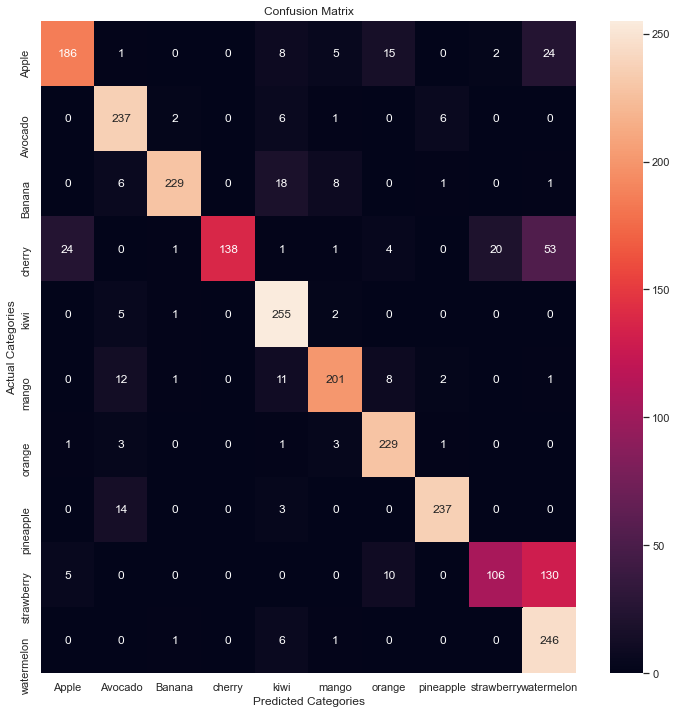

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       216
           1       0.94      0.85      0.89       278
           2       0.87      0.97      0.92       235
           3       0.57      1.00      0.73       138
           4       0.97      0.83      0.89       309
           5       0.85      0.91      0.88       222
           6       0.96      0.86      0.91       266
           7       0.93      0.96      0.95       247
           8       0.42      0.83      0.56       128
           9       0.97      0.54      0.69       455

    accuracy                           0.83      2494
   macro avg       0.83      0.86      0.82      2494
weighted avg       0.87      0.83      0.83      2494



In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

print("Time to evaluate our data.")
print("First will be the training data.")

#building Confusion Matrix as well as getting accuracy, predictions and F1 score for train model
model.eval()
prediction_list = []
accurate_list = []
with torch.no_grad():
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(model(images), 1)
        prediction_list.extend(predicted.detach().cpu().numpy())
        accurate_list.extend(labels.detach().cpu().numpy())
        
sns.set(rc={'figure.figsize':(12,12)})
confusion_matrix_data = confusion_matrix(accurate_list, prediction_list)
confusionMatrix = sns.heatmap(confusion_matrix_data, annot=True, fmt='g' )
confusionMatrix.set_title('Confusion Matrix');
confusionMatrix.set_xlabel('Predicted Categories')
confusionMatrix.set_ylabel('Actual Categories');
confusionMatrix.xaxis.set_ticklabels(['Apple','Avocado','Banana','cherry','kiwi','mango','orange','pineapple','strawberry','watermelon'])
confusionMatrix.yaxis.set_ticklabels(['Apple','Avocado','Banana','cherry','kiwi','mango','orange','pineapple','strawberry','watermelon'])


plt.show()

#printing Accuracy, Prediction and F1 score for training model
print(classification_report(prediction_list, accurate_list))

Now to evaluate the testing data.


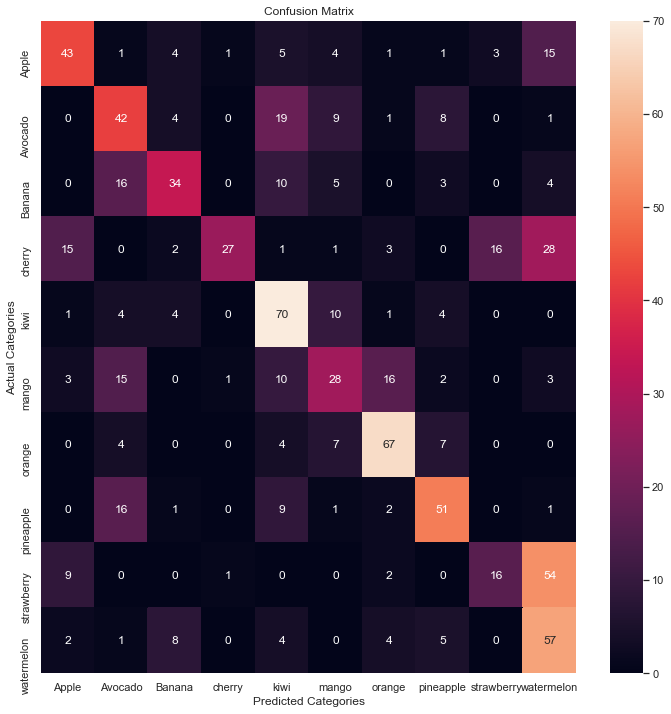

              precision    recall  f1-score   support

           0       0.55      0.59      0.57        73
           1       0.50      0.42      0.46        99
           2       0.47      0.60      0.53        57
           3       0.29      0.90      0.44        30
           4       0.74      0.53      0.62       132
           5       0.36      0.43      0.39        65
           6       0.75      0.69      0.72        97
           7       0.63      0.63      0.63        81
           8       0.20      0.46      0.27        35
           9       0.70      0.35      0.47       163

    accuracy                           0.52       832
   macro avg       0.52      0.56      0.51       832
weighted avg       0.59      0.52      0.53       832



In [42]:
#building Confusion Matrix as well as getting accuracy, predictions and F1 score for test model

print("Now to evaluate the testing data.")
model.eval()
prediction_list = []
accurate_list = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(model(images), 1)
        prediction_list.extend(predicted.detach().cpu().numpy())
        accurate_list.extend(labels.detach().cpu().numpy())

sns.set(rc={'figure.figsize':(12,12)})

confusion_matrix_data = confusion_matrix(accurate_list, prediction_list)
confusionMatrix = sns.heatmap(confusion_matrix_data, annot=True, fmt='g' )
confusionMatrix.set_title('Confusion Matrix');
confusionMatrix.set_xlabel('Predicted Categories')
confusionMatrix.set_ylabel('Actual Categories');
confusionMatrix.xaxis.set_ticklabels(['Apple','Avocado','Banana','cherry','kiwi','mango','orange','pineapple','strawberry','watermelon'])
confusionMatrix.yaxis.set_ticklabels(['Apple','Avocado','Banana','cherry','kiwi','mango','orange','pineapple','strawberry','watermelon'])

  
plt.show()

#printing Accuracy, Prediction and F1 score for testing model
print(classification_report(prediction_list, accurate_list))